In [1]:
# #project 2
# import pandas as pd
# from pathlib import Path
# import numpy as np

# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas as hv
# import matplotlib.pyplot as plt
# from sklearn import svm
# from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
import datetime as dt
from finta import TA
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 300)

from sklearn.linear_model import LogisticRegression

In [2]:
#Read CSV
Path="Resources/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
price_df= pd.read_csv(Path)
price_df.head()

RegionID  SizeRank  RegionName RegionType StateName State      City                             Metro       CountyName  1996-01-31  1996-02-29  1996-03-31  1996-04-30  1996-05-31  1996-06-30  1996-07-31  1996-08-31  1996-09-30  1996-10-31  1996-11-30  1996-12-31  1997-01-31  1997-02-28  \
0     61639         0       10025        Zip        NY    NY  New York       New York-Newark-Jersey City  New York County    232527.0    231079.0    231156.0    231131.0    231660.0    232303.0    232189.0    233004.0    233358.0    234978.0    236222.0    237784.0    239242.0    242128.0   
1     84654         1       60657        Zip        IL    IL   Chicago          Chicago-Naperville-Elgin      Cook County    208780.0    208625.0    208220.0    208086.0    207527.0    207709.0    207498.0    208100.0    208982.0    210481.0    212131.0    213375.0    214829.0    216221.0   
2     61637         2       10023        Zip        NY    NY  New York       New York-Newark-Jersey City  New York County    184917.0    184955.0    185058.0    185717.0    186675.0    187460.0    187721.0    187799.0    188094.0    188653.0    189402.0    190174.0    191207.0    192674.0   
3     91982         3       77494        Zip        TX    TX      Katy  Houston-The Woodlands-Sugar Land    Harris County    199929.0    200176.0    199980.0    198794.0    197659.0    196995.0    197755.0    197444.0    196792.0    196004.0    196904.0    198584.0    201137.0    202377.0   
4     84616         4       60614        Zip        IL    IL   Chicago          Chicago-Naperville-Elgin      Cook County    281068.0    280811.0    280293.0    280152.0    279477.0    279565.0    279073.0    279632.0    280708.0    282640.0    284909.0    286851.0    289487.0    291594.0   

   1997-03-31  1997-04-30  1997-05-31  1997-06-30  1997-07-31  1997-08-31  1997-09-30  1997-10-31  1997-11-30  1997-12-31  1998-01-31  1998-02-28  1998-03-31  1998-04-30  1998-05-31  1998-06-30  1998-07-31  1998-08-31  1998-09-30  1998-10-31  1998-11-30  1998-12-31  1999-01-31  1999-02-28  \
0    243761.0    244686.0    245518.0    246394.0    249020.0    249559.0    251200.0    250857.0    252853.0    255463.0    258902.0    262192.0    266377.0    271217.0    275049.0    279088.0    281662.0    286647.0    291438.0    297970.0    301747.0    304445.0    307239.0    310102.0   
1    218041.0    218793.0    220497.0    221091.0    222367.0    221917.0    220814.0    218823.0    217112.0    216830.0    216851.0    217205.0    217693.0    219126.0    220469.0    222036.0    223738.0    226938.0    231318.0    236296.0    240885.0    244528.0    247339.0    249824.0   
2    194474.0    195781.0    196895.0    198301.0    200415.0    202614.0    204777.0    206792.0    209007.0    211538.0    213901.0    215575.0    216772.0    217833.0    218950.0    220621.0    222671.0    225195.0    227007.0    228894.0    230320.0    231816.0    232936.0    234502.0   
3    203650.0    205850.0    208300.0    210007.0    209676.0    211814.0    214317.0    216515.0    215586.0    213881.0    211157.0    209551.0    207850.0    206914.0    205878.0    205470.0    205363.0    204089.0    203577.0    204043.0    205662.0    206517.0    207060.0    207771.0   
4    293823.0    294435.0    296257.0    296973.0    298096.0    297277.0    295389.0    292473.0    289808.0    288722.0    287331.0    286985.0    287403.0    289190.0    290959.0    292906.0    295963.0    300356.0    306200.0    312439.0    317964.0    322204.0    325500.0    328567.0   

   1999-03-31  1999-04-30  1999-05-31  1999-06-30  1999-07-31  1999-08-31  1999-09-30  1999-10-31  1999-11-30  1999-12-31  2000-01-31  2000-02-29  2000-03-31  2000-04-30  2000-05-31  2000-06-30  2000-07-31  2000-08-31  2000-09-30  2000-10-31  2000-11-30  2000-12-31  2001-01-31  2001-02-28  \
0    313135.0    315312.0    319584.0    324729.0    332882.0    340698.0    349480.0    357100.0    365522.0    373862.0    380388.0    387779.0    395195.0    405276.0    414387.0    422915.

In [3]:
#Filter dataframe
price_df=price_df.drop(columns=["RegionID","SizeRank","RegionName","RegionType","StateName"]).copy()
price_df.tail()

State              City                    Metro        CountyName  1996-01-31  1996-02-29  1996-03-31  1996-04-30  1996-05-31  1996-06-30  1996-07-31  1996-08-31  1996-09-30  1996-10-31  1996-11-30  1996-12-31  1997-01-31  1997-02-28  1997-03-31  1997-04-30  1997-05-31  1997-06-30  \
30338    OR     Central Point                  Medford    Jackson County         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN   
30339    TX         Texarkana                Texarkana      Bowie County         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN   
30340    MA            Groton  Boston-Cambridge-Newton  Middlesex County         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN   
30341    LA         Choudrant                   Ruston    Lincoln Parish         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN   
30342    UT  Charlotte Amalie                      NaN       Kane County         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN   

       1997-07-31  1997-08-31  1997-09-30  1997-10-31  1997-11-30  1997-12-31  1998-01-31  1998-02-28  1998-03-31  1998-04-30  1998-05-31  1998-06-30  1998-07-31  1998-08-31  1998-09-30  1998-10-31  1998-11-30  1998-12-31  1999-01-31  1999-02-28  1999-03-31  1999-04-30  1999-05-31  1999-06-30  \
30338         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN   
30339         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN   
30340         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN   
30341         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN   
30342         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN   

       1999-07-31  1999-08-31  1999-09-30  1999-10-31  1999-11-30  1999-12-31  2000-01-31  2000-02-29  2000-03-31  2000-04-30  2000-05-31  2000-06-30  2000-07-31  2000-08-31  2000-09-30  2000-10-31  2000-11-30  2000-12-31  2001-01-31  2001-02-28  2001-03-31  2001-04-30  2001-05-31  2001-06-30  \
30338         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN

In [4]:
#extract only Bay Area Counties
bayarea_price_df = price_df[price_df["CountyName"].isin(["San Francisco County","San Mateo County","Santa Clara County","Alameda County","Contra Costa County","Marin County", "Sonoma County"])].dropna()
# bayarea_price_df

In [5]:
#merge rows based on cities and average the prices
bayarea_price_df = bayarea_price_df.groupby("City").mean()
# bayarea_price_df.head(10)
bayarea_price_df.tail(10)

1996-01-31     1996-02-29     1996-03-31  1996-04-30     1996-05-31     1996-06-30     1996-07-31     1996-08-31  1996-09-30     1996-10-31     1996-11-30     1996-12-31     1997-01-31     1997-02-28     1997-03-31     1997-04-30    1997-05-31  1997-06-30  1997-07-31    1997-08-31  \
City                                                                                                                                                                                                                                                                                                       
Stanford         889953.0  887237.000000  885073.000000    880249.0  877671.000000  877668.000000  880005.000000  882395.000000    885890.0  895623.000000  905927.000000  917659.000000  936647.000000  958905.000000  983797.000000  998907.000000  1.011094e+06  1022432.00   1028708.0  1.037316e+06   
Sunnyvale        280969.5  280449.750000  280286.000000    280173.5  280281.000000  280720.000000  281136.000000  282073.000000    283058.5  284779.500000  287147.750000  289776.000000  292773.000000  295911.500000  299284.000000  302431.250000  3.056690e+05   309018.75    312502.0  3.159572e+05   
Sunol            225325.0  225673.000000  225943.000000    227042.0  228308.000000  229935.000000  231743.000000  234449.000000    236917.0  239859.000000  242375.000000  245896.000000  250023.000000  253672.000000  256389.000000  258237.000000  2.609540e+05   263809.00    266180.0  2.669370e+05   
The Sea Ranch    385853.0  384703.000000  384241.000000    380572.0  374527.000000  369613.000000  366460.000000  366109.000000    365057.0  365934.000000  367810.000000  368336.000000  366970.000000  365031.000000  363131.000000  364158.000000  3.680160e+05   371352.00    373601.0  3.724560e+05   
Tiburon          637431.0  632332.000000  628498.000000    621511.0  616985.000000  613715.000000  610722.000000  609420.000000    608861.0  611261.000000  613273.000000  616856.000000  620603.000000  626317.000000  633460.000000  638766.000000  6.425010e+05   644094.00    648732.0  6.547740e+05   
Tomales          361426.0  361838.000000  363166.000000    365012.0  367697.000000  371855.000000  375624.000000  375387.000000    371345.0  368291.000000  367628.000000  368582.000000  369563.000000  371301.000000  373128.000000  374368.000000  3.762360e+05   375258.00    375317.0  3.808090e+05   
Union City       200579.0  199914.000000  199690.000000    199190.0  199051.000000  198737.000000  198392.000000  198337.000000    198617.0  199434.000000  200265.000000  201242.000000  201939.000000  203036.000000  204236.000000  205834.000000  2.076690e+05   209608.00    212027.0  2.140990e+05   
Walnut Creek     176408.0  175915.333333  175676.333333    174950.0  174947.666667  174924.333333  175796.333333  176614.666667    177540.0  178469.666667  178996.666667  179794.333333  180634.333333  181992.333333  183480.333333  184979.333333  1.866373e+05   188307.00    189166.0  1.895523e+05   
Windsor          196797.0  196495.000000  196396.000000    196024.0  195706.000000  195350.000000  195244.000000  195482.000000    195986.0  196721.000000  197363.000000  198095.000000  198073.000000  198452.000000  198558.000000  199426.000000  2.001030e+05   201087.00    201806.0  2.025020e+05   
Woodacre         351023.0  346049.000000  343912.000000    340124.0  339538.000000  340910.000000  340496.000000  340995.000000    339745.0  340996.000000  341813.000000  343764.000000  349151.000000  357783.000000  366327.000000  371194.000000  3.735120e+05   373858.00    375583.0  3.767120e+05   

               1997-09-30  1997-10-31    1997-11-30    1997-12-31    1998-01-31    1998-02-28  1998-03-31  1998-04-30    1998-05-31    1998-06-30    1998-07-31    1998-08-31    1998-09-30    1998-10-31    1998-11-30  1998-12-31    1999-01-31  1999-02-28    1999-03-31    1999-04-30  1999-05-31  \
City                                                                                                                 

In [6]:
transposed_bayarea_price_df = bayarea_price_df.transpose()
# transposed_bayarea_price_df

In [7]:
#percent change of each year
yoy_percent_change=transposed_bayarea_price_df.pct_change().dropna()
# yoy_percent_change

In [8]:
#percent_change of prices
index_dates=["1996-01-31","2001-01-31","2006-01-31","2011-01-31","2016-01-31","2020-01-31","2020-07-31","2020-10-31","2020-12-31","2021-01-31"]
values_df=pd.DataFrame(transposed_bayarea_price_df, index=index_dates)
values_df

City          Alameda      Alamo     Albany   Antioch   Atherton    Belmont     Berkeley  Bethel Island  Bodega Bay  Brentwood   Brisbane  Burlingame   Campbell  Castro Valley  Cazadero    Clayton  Cloverdale   Concord  Corte Madera    Cotati  Cupertino  Daly City   Danville     Diablo  \
1996-01-31   205976.5   519268.0   215162.0  135345.5   768920.0   382693.0   230439.500        91301.0    290389.0   177652.0   228102.0    535799.0   263969.0       245340.0  318269.0   269675.0    176171.0  101296.0      437762.0  202418.0   394847.0   240849.5   416048.0   576257.0   
2001-01-31   337306.5   863522.0   367804.0  197536.0  1807420.0   733908.0   403278.000       139880.0    422675.0   264694.0   420510.0   1011577.0   525792.0       395376.0  393869.0   471893.0    266229.0  160540.0      785975.0  326604.0   770495.0   419583.0   716573.0  1050115.0   
2006-01-31   574908.5  1729667.0   644840.0  444517.5  2416121.0  1018108.0   671282.625       304730.0    807394.0   559628.0   692181.0   1446501.0   747751.0       703206.5  669391.0  1002822.0    535725.0  349831.0     1224842.0  622839.0  1008180.0   729212.0  1406445.0  1992040.0   
2011-01-31   495473.5  1162808.0   561041.0  240277.0  2230351.0   853309.0   597957.625       182899.0    671677.0   287088.0   543747.0   1276192.0   706991.0       535099.5  441856.0   782303.0    337790.0  232154.0      961946.0  342884.0  1061187.0   525794.5   980013.0  1403357.0   
2016-01-31   826009.5  1741298.0   904633.0  355551.5  4764834.0  1594607.0  1030164.875       324261.0    844408.0   556908.0   836975.0   2406004.0  1097071.0       795741.0  525762.0   968669.0    466734.0  388317.0     1291962.0  491086.0  1754445.0   868208.0  1444022.0  1969595.0   
2020-01-31  1039883.0  1842825.0  1095864.0  478637.0  6448653.0  1823825.0  1394527.375       426035.0    971913.0   673448.0  1043406.0   2962775.0  1341761.0       946830.5  562672.0  1031124.0    562854.0  451661.0     1424816.0  588434.0  2047515.0  1088100.0  1595590.5  2158976.0   
2020-07-31  1045308.5  1891990.0  1118224.0  483688.0  6477371.0  1835523.0  1403347.375       454173.0    997639.0   682459.0  1072795.0   2962235.0  1381304.0       969207.0  562232.0  1040469.0    578631.0  460895.0     1504166.0  599763.0  2155612.0  1085098.5  1632331.0  2179395.0   
2020-10-31  1077678.5  1996807.0  1161087.0  500070.5  6559876.0  1881854.0  1441616.125       480198.0   1044094.0   711031.0  1089723.0   3026478.0  1436769.0      1014818.5  561828.0  1097241.0    596352.0  482197.0     1533041.0  617376.0  2251991.0  1093215.0  1713644.0  2284894.0   
2020-12-31  1098396.5  2044018.0  1184064.0  507494.0  6586869.0  1913411.0  1469732.250       500088.0   1089233.0   726098.0  1109885.0   3073942.0  1457863.0      1045243.5  563246.0  1109826.0    611970.0  492531.0     1547694.0  631043.0  2297986.0  1094758.0  1754827.0  2343763.0   
2021-01-31  1104088.0  2077690.0  1189380.0  514168.0  6557351.0  1921137.0  1480483.875       511506.0   1104113.0   737794.0  1116322.0   3072283.0  1461838.0      1054366.0  562972.0  1112276.0    613258.0  498654.0     1558905.0  633019.0  2311501.0  1091106.5  1786938.0  2388339.0   

City        Dillon Beach  Discovery Bay     Dublin  East Foothills  El Cerrito  El Sobrante    Fairfax  Forestville  Foster City     Fremont    Fulton  Geyserville    Gilroy  Glen Ellen    Graton  Guerneville  Half Moon Bay    Hayward  Healdsburg    Jenner  Kentfield    Kenwood  La Honda  \
1996-01-31      425738.0       181296.0   245815.0        306188.0    147050.0     152828.0   274369.0     217177.0     310390.0   225692.00  264203.0     213161.0  222100.0    228822.0  175400.0     157489.0       386630.5  188726.75    240028.0  362257.0   503107.0   235382.0  460412.0   
2001-01-31      559314.0       255893.0   396477.0        589674.0    259097.0     235627.0   447499.0     307008.0     582038.0   410210.50  430112.0     318720.0  402110.0    410348.0  282540.0     218303.0       678076.0  

In [9]:
city_list=list(values_df.columns)
twentyfive_years=[]
twenty_years=[]
fifteen_years=[]
ten_years=[]
five_years=[]
one_year=[]
six_months=[]
three_months=[]
one_month=[]

for city in city_list:
    twentyfive_years.append((values_df[city][9]-values_df[city][0])/values_df[city][0])    
    twenty_years.append((values_df[city][9]-values_df[city][1])/values_df[city][1])    
    fifteen_years.append((values_df[city][9]-values_df[city][2])/values_df[city][2])        
    ten_years.append((values_df[city][9]-values_df[city][3])/values_df[city][3])
    five_years.append((values_df[city][9]-values_df[city][4])/values_df[city][4])    
    one_year.append((values_df[city][9]-values_df[city][5])/values_df[city][5])
    six_months.append((values_df[city][9]-values_df[city][6])/values_df[city][6])
    three_months.append((values_df[city][9]-values_df[city][7])/values_df[city][7])
    one_month.append((values_df[city][9]-values_df[city][8])/values_df[city][8])

print (twentyfive_years,twenty_years,fifteen_years,ten_years,five_years,one_year,six_months,three_months,one_month)

[4.360261971632687, 3.0011901368849996, 4.527834840724664, 2.798929406592757, 7.5280016126515115, 4.020047400919275, 5.424609821666858, 4.6024139932749915, 2.8021860332175117, 3.153029518384257, 3.893959719774487, 4.73402152672924, 4.537915437039955, 3.2975707181870058, 0.7688559049106259, 3.124505423194586, 2.4810383093698736, 3.922741273100616, 2.5610788510651905, 2.1272861109189893, 4.854168829951854, 3.530241914556601, 3.2950284582548166, 3.1445726472736992, 1.4304478341139386, 2.812505515841497, 3.1329129630006305, 4.310162383894862, 5.769880992859572, 3.0259376554034603, 2.8754414675127293, 1.807732863056401, 4.038271207190953, 4.675078203923932, 2.3121766217643254, 3.408855278404586, 2.8477262494371907, 4.281458950625377, 3.0643842645381985, 2.1754090761894482, 2.4921042183687008, 3.3864780694840557, 2.5452822170746745, 1.0429667335620845, 3.0744374457123436, 4.0335072350477095, 1.0880559151368774, 4.004061119168887, 1.67490825619211, 3.14147417315916, 2.547491291977984, 3.12805

In [10]:
#one month
one_month_array=np.array(one_month)
round_to_thousands_1m=np.around(one_month_array,4)
one_month_rounded=list(round_to_thousands_1m)

#three months 
three_months_array=np.array(three_months)
round_to_thousands_3m=np.around(three_months_array,4)
three_months_rounded=list(round_to_thousands_3m)

#six months
six_months_array=np.array(six_months)
round_to_thousands_6m=np.around(six_months_array,4)
six_months_rounded=list(round_to_thousands_6m)

#one year
one_year_array=np.array(one_year)
round_to_thousands_1=np.around(one_year_array,4)
one_year_rounded=list(round_to_thousands_1)

#five years
five_years_array=np.array(five_years)
round_to_thousands_5=np.around(five_years_array,4)
five_years_rounded=list(round_to_thousands_5)

#ten years
ten_years_array=np.array(ten_years)
round_to_thousands_10=np.around(ten_years_array,4)
ten_years_rounded=list(round_to_thousands_10)

#fifteen years
fifteen_years_array=np.array(fifteen_years)
round_to_thousands_15=np.around(fifteen_years_array,4)
fifteen_years_rounded=list(round_to_thousands_15)

#twenty years
twenty_years_array=np.array(twenty_years)
round_to_thousands_20=np.around(twenty_years_array,4)
twenty_years_rounded=list(round_to_thousands_20)

#twenty five years
twentyfive_years_array=np.array(twentyfive_years)
round_to_thousands_25=np.around(twentyfive_years_array,4)
twentyfive_years_rounded=list(round_to_thousands_25)


In [11]:
#pct_change of 0.25, 0.5, 1, 5, 10, 15, 20, 25 years in prices
index_names=["25_years","20_years","15_years","10_years","5_years","1_year","6_months","3_months","1_month"]
growth_df=pd.DataFrame(index=index_names)
for i in range(len(city_list)):
    growth_df[city_list[i]]=[twentyfive_years_rounded[i] , twenty_years_rounded[i] , fifteen_years_rounded[i] , ten_years_rounded[i] , five_years_rounded[i], one_year_rounded[i] , six_months_rounded[i] , three_months_rounded[i] , one_month_rounded[i]]

growth_df=growth_df.transpose()
growth_df

25_years  20_years  15_years  10_years  5_years  1_year  6_months  3_months  1_month
Alameda                4.3603    2.2732    0.9205    1.2283   0.3367  0.0617    0.0562    0.0245   0.0052
Alamo                  3.0012    1.4061    0.2012    0.7868   0.1932  0.1274    0.0982    0.0405   0.0165
Albany                 4.5278    2.2337    0.8445    1.1200   0.3148  0.0853    0.0636    0.0244   0.0045
Antioch                2.7989    1.6029    0.1567    1.1399   0.4461  0.0742    0.0630    0.0282   0.0132
Atherton               7.5280    2.6280    1.7140    1.9401   0.3762  0.0169    0.0123   -0.0004  -0.0045
Belmont                4.0200    1.6177    0.8870    1.2514   0.2048  0.0534    0.0466    0.0209   0.0040
Berkeley               5.4246    2.6711    1.2055    1.4759   0.4371  0.0616    0.0550    0.0270   0.0073
Bethel Island          4.6024    2.6567    0.6786    1.7967   0.5775  0.2006    0.1262    0.0652   0.0228
Bodega Bay             2.8022    1.6122    0.3675    0.6438   0.3076  0.1360    0.1067    0.0575   0.0137
Brentwood              3.1530    1.7873    0.3184    1.5699   0.3248  0.0955    0.0811    0.0376   0.0161
Brisbane               3.8940    1.6547    0.6128    1.0530   0.3338  0.0699    0.0406    0.0244   0.0058
Burlingame             4.7340    2.0371    1.1239    1.4074   0.2769  0.0370    0.0372    0.0151  -0.0005
Campbell               4.5379    1.7803    0.9550    1.0677   0.3325  0.0895    0.0583    0.0174   0.0027
Castro Valley          3.2976    1.6667    0.4994    0.9704   0.3250  0.1136    0.0879    0.0390   0.0087
Cazadero               0.7689    0.4293   -0.1590    0.2741   0.0708  0.0005    0.0013    0.0020  -0.0005
Clayton                3.1245    1.3571    0.1091    0.4218   0.1483  0.0787    0.0690    0.0137   0.0022
Cloverdale             2.4810    1.3035    0.1447    0.8155   0.3139  0.0896    0.0598    0.0283   0.0021
Concord                3.9227    2.1061    0.4254    1.1479   0.2841  0.1040    0.0819    0.0341   0.0124
Corte Madera           2.5611    0.9834    0.2727    0.6206   0.2066  0.0941    0.0364    0.0169   0.0072
Cotati                 2.1273    0.9382    0.0163    0.8462   0.2890  0.0758    0.0554    0.0253   0.0031
Cupertino              4.8542    2.0000    1.2927    1.1782   0.3175  0.1289    0.0723    0.0264   0.0059
Daly City              3.5302    1.6005    0.4963    1.0752   0.2567  0.0028    0.0055   -0.0019  -0.0033
Danville               3.2950    1.4937    0.2705    0.8234   0.2375  0.1199    0.0947    0.0428   0.0183
Diablo                 3.1446    1.2744    0.1989    0.7019   0.2126  0.1062    0.0959    0.0453   0.0190
Dillon Beach           1.4304    0.8500    0.0414    0.5515   0.1652  0.1031    0.0981    0.0518   0.0230
Discovery Bay          2.8125    1.7011    0.5075    1.4962   0.3408  0.0948    0.0781    0.0379   0.0153
Dublin                 3.1329    1.5624    0.4576    0.9048   0.2248  0.0686    0.0653    0.0295   0.0062
East Foothills         4.3102    1.7573    0.7130    0.9698   0.4084  0.0985    0.0756    0.0406   0.0156
El Cerrito             5.7699    2.8422    0.9420    1.5217   0.6006  0.0909    0.0637    0.0237   0.0107
El Sobrante            3.0259    1.6112    0.3783    1.2193   0.6620  0.0986    0.1029    0.0518   0.0236
Fairfax                2.8754    1.3761    0.4638    0.8037   0.2832  0.1385    0.0679    0.0246   0.0040
Forestville            1.8077    0.9862    0.0291    0.7450   0.2771  0.0672    0.0520    0.0255   0.0041
Foster City            4.0383    1.6868    0.8609    1.1377   0.2165  0.0439    0.0379    0.0175   0.0024
Fremont                4.6751    2.1223    0.9026    1.2761   0.3655  0.0702    0.0651    0.0310   0.0062
Fulton                 2.3122    1.0346    0.0283    0.6945   0.3179  0.0874    0.0344    0.0045  -0.0076
Geyserville            3.4089    1.9487    0.5419    0.9163   0.3352  0.0748    0.0542    0.0299  -0.0021
Gilroy                 2.8477    1.1252    0.3122    1.0101   0.2700  0.0869    0.0605    0.0245   

In [12]:
# Plot the actual returns versus the LR strategy returns
growth_df=growth_df.sort_values('25_years')
growth_df_hvplot = (1 + growth_df[[
    "25_years", "20_years", "15_years", "10_years", "5_years", "1_year", "6_months", "3_months", "1_month"]]
                            ).hvplot(title="YoY Returns - SF Bay Area - Sorted by Returns during the last 25 Years" 
                                              )

growth_df_hvplot.opts(legend_position='top_left').opts(width=800, height=400)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [13]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(growth_df)

In [14]:
# Create a DataFrame with the scaled data
growth_df_scaled = pd.DataFrame(
    scaled_data,
    columns=growth_df.columns
)

# Copy the crypto names from the original data
growth_df_scaled["City"] = growth_df.index

# Set the City column as index
growth_df_scaled = growth_df_scaled.set_index("City")

# Display sample data
growth_df_scaled.head()

25_years  20_years  15_years  10_years   5_years    1_year  6_months  3_months   1_month
City                                                                                                  
San Quentin  -2.192028 -2.458364 -1.583353 -1.844897 -2.448331 -3.681637 -4.126688 -3.243083 -1.261031
Cazadero     -2.113863 -2.034319 -1.773797 -2.191236 -2.063903 -1.961873 -2.064281 -1.551829 -1.157255
Jenner       -1.885693 -1.527893 -0.782230 -1.947583 -1.032064  0.384619  0.181450  0.607220  0.132540
La Honda     -1.848150 -2.166902 -0.403965 -2.404507 -0.687826  1.770697  0.492448  0.949069 -0.386343
Dillon Beach -1.563208 -1.260704 -1.248109 -1.348478 -1.239131  0.232750  1.104623  1.434855  2.326674

---

# Cluster Cities with K-means

In this section, you will use the K-Means algorithm with a given value for `k` to cluster the cryptocurrencies according to the price changes of cryptocurrencies provided.

1. Initialize the K-Means model with four clusters (`n_clusters=4`). 

2. Fit the K-Means model using the scaled data.

3. Predict the clusters to group the cryptocurrencies using the scaled data. View the resulting array of cluster values.

4. Add a new column to the DataFrame with the scaled data with the predicted clusters.

In [15]:
# Initialize the K-Means model with four clusters
model = KMeans(n_clusters=4)

In [16]:
# Fit the K-Means model using the scaled data
model.fit(growth_df_scaled)

KMeans(n_clusters=4)

In [17]:
# Predict the clusters to group the cryptocurrencies using the scaled data
city_clusters_k4 = model.predict(growth_df_scaled)

# View the resulting array of cluster values.
print(city_clusters_k4)

[0 0 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 1 3 0 3 3 3 3 3 3 3 3 3 3
 0 1 1 3 1 3 1 3 3 1 3 3 1 3 0 3 3 1 3 3 3 0 3 1 1 3 1 3 1 0 1 0 3 1 0 0 1
 0 0 0 1 1 2 0 0 1 0 1 1 0 1 1 0 2 0 2 1 1 2 0 2 0 2 2 1 0 2 2 2 2 1 2 2 2
 2 2 2 2 2 2]


In [18]:
# Note: The code for this step is provided for you.

# Add a new column to the DataFrame with the predicted clusters with k=4
growth_df_scaled["city_clusters_k4"] = city_clusters_k4

# Display sample data
growth_df_scaled.head()

25_years  20_years  15_years  10_years   5_years    1_year  6_months  3_months   1_month  city_clusters_k4
City                                                                                                                    
San Quentin  -2.192028 -2.458364 -1.583353 -1.844897 -2.448331 -3.681637 -4.126688 -3.243083 -1.261031                 0
Cazadero     -2.113863 -2.034319 -1.773797 -2.191236 -2.063903 -1.961873 -2.064281 -1.551829 -1.157255                 0
Jenner       -1.885693 -1.527893 -0.782230 -1.947583 -1.032064  0.384619  0.181450  0.607220  0.132540                 3
La Honda     -1.848150 -2.166902 -0.403965 -2.404507 -0.687826  1.770697  0.492448  0.949069 -0.386343                 3
Dillon Beach -1.563208 -1.260704 -1.248109 -1.348478 -1.239131  0.232750  1.104623  1.434855  2.326674                 3

In [19]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_14d"` and `y="price_change_percentage_1y"`.
# Group the results by the clusters using `by="crypto_cluster_k4".
# Set the hover to the coin id using `hover_cols=["coin_id"]`.

growth_df_scaled.hvplot.scatter(
    title="Scatter Plot by City - k=4",
    x="5_years",
    y="25_years",
    by="city_clusters_k4",
    hover_cols=["City"],
    marker=["hex", "square", "inverted_triangle", "triangle"],
).opts(legend_position='bottom_right').opts(width=1000, height=600)

:NdOverlay   [city_clusters_k4]
   :Scatter   [5_years]   (25_years,City)

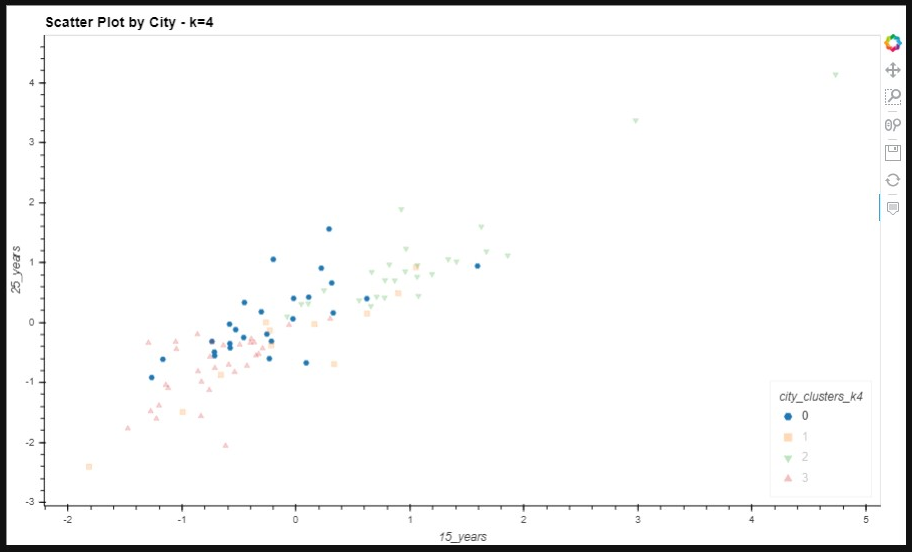



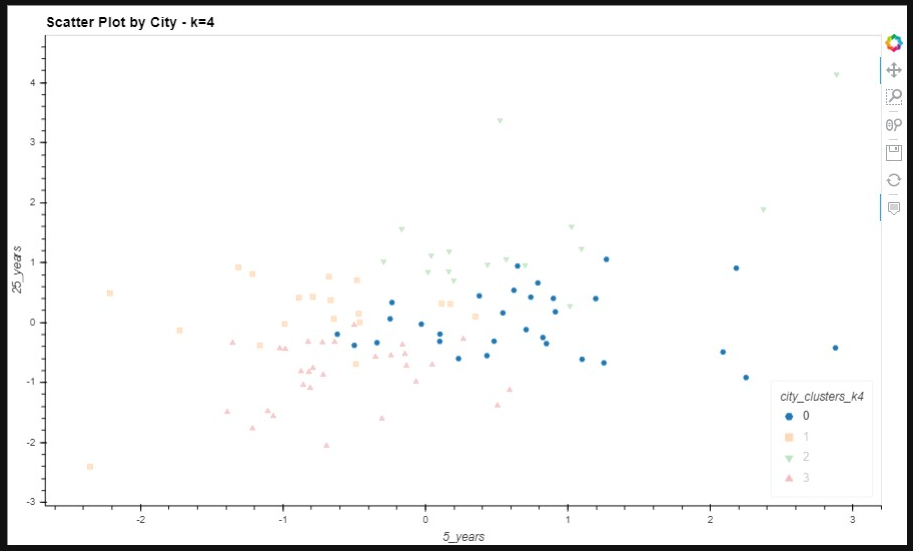

In [20]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_0_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["0"])].dropna()

bayarea_0_cities

25_years  20_years  15_years  10_years   5_years    1_year  6_months  3_months   1_month  city_clusters_k4
City                                                                                                                           
San Quentin         -2.192028 -2.458364 -1.583353 -1.844897 -2.448331 -3.681637 -4.126688 -3.243083 -1.261031                 0
Cazadero            -2.113863 -2.034319 -1.773797 -2.191236 -2.063903 -1.961873 -2.064281 -1.551829 -1.157255                 0
San Geronimo        -1.291669 -1.120949 -0.773836 -1.481241 -1.426976 -0.346922 -0.964331 -1.311935 -1.468585                 0
Fulton              -0.829169 -0.921247 -1.282473 -0.914035  0.095009 -0.103075 -0.980699 -1.401895 -2.209846                 0
Half Moon Bay       -0.679414 -1.001054 -0.443838 -0.704105 -0.712289 -1.213220 -0.764638 -0.760178 -0.712498                 0
Stanford            -0.502855 -0.483043  0.533564 -0.494783 -0.469401 -1.901981 -2.434205 -2.457430 -1.201731                 0
Kentfield           -0.194688 -0.403971 -0.008125 -0.247181 -1.184087 -0.496652 -1.635432 -1.623797 -0.831100                 0
Larkspur            -0.138832 -0.666931 -0.519648 -0.773373 -0.627541  0.127938 -0.961057 -1.173995 -0.490120                 0
San Francisco        0.052378 -0.589330 -0.020979 -0.536404 -1.781698 -2.877369 -2.954717 -2.817271 -1.779914                 0
Geyserville          0.083761  0.759670  0.064800 -0.240194  0.246159 -0.372590 -0.332514  0.121434 -1.394458                 0
Millbrae             0.157764 -0.068928  0.363844  0.084575 -0.999737 -1.872035 -1.399728 -1.191987 -1.172080                 0
Daly City            0.184735  0.119373 -0.054818  0.242554 -0.439695 -1.912676 -1.926788 -1.785726 -1.572361                 0
Los Gatos            0.243837 -0.429716  0.500250 -0.544000 -0.632783 -0.406814 -0.460187 -0.700204 -0.786624                 0
South San Francisco  0.280464  0.219224  0.128281  0.472231  0.420899 -0.907342 -1.010162 -0.772172 -0.771799                 0
Palo Alto            0.329162 -0.047781  0.818706  0.206705 -0.449306 -0.404675 -1.026531 -1.473863 -1.424109                 0
Brisbane             0.487574  0.219040  0.250784  0.175109  0.233928 -0.477401 -0.777732 -0.208421 -0.223265                 0
San Bruno            0.495066  0.416168  0.311118  0.501093  0.169274 -1.029266 -0.771185 -0.550270 -0.860750                 0
Redwood City         0.548258  0.058506  0.750765  0.583728 -0.658120 -1.033544 -0.781006 -0.460310 -0.668022                 0
Belmont              0.592460  0.151002  0.970064  0.777860 -0.893145 -0.830338 -0.581313 -0.418328 -0.490120                 0
Foster City          0.607694  0.278068  0.901599  0.432433 -0.790922 -1.033544 -0.866121 -0.622239 -0.727323                 0
Portola Valley       0.662884 -0.223761  1.088632  0.484991 -2.300676 -2.319088 -1.848220 -1.881683 -2.180196                 0
San Mateo            0.879483  0.558129  0.973736  0.963486 -0.461538 -1.178996 -0.964331 -0.652225 -0.756974                 0
Menlo Park           0.979958  0.412306  1.380069  0.735935 -1.239131 -1.662412 -1.288424 -0.730191 -0.801449                 0
Sunol                1.091421  0.575598  1.241040  0.082752 -1.344848 -1.914815 -1.118193 -1.233969 -1.438934                 0

In [21]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_1_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["1"])].dropna()

bayarea_1_cities

25_years  20_years  15_years  10_years   5_years    1_year  6_months  3_months   1_month  city_clusters_k4
City                                                                                                                           
Rodeo               -0.724449 -0.240679 -1.042188 -1.673550  2.435651  0.343978  0.855825  0.457286  1.689189                 1
Point Reyes Station -0.482377 -0.364803  0.293018  0.250757  1.377601  2.093688  0.990045  0.895093  0.606947                 1
Antioch             -0.424024  0.123786 -0.945655  0.439116  1.215093 -0.385424 -0.044432  0.019479  0.873802                 1
Discovery Bay       -0.412702  0.304364 -0.025438  1.521577  0.295087  0.055212  0.449891  0.601222  1.185131                 1
Oakley              -0.364005  0.571737 -0.497876  1.154276  0.506522  0.035961  0.453164  1.428857  2.089470                 1
Richmond            -0.303820  0.607043 -0.500499  1.294330  2.264406  0.538628  0.777257  0.619214  1.407510                 1
El Sobrante         -0.235061  0.139049 -0.364355  0.680338  3.101411  0.136494  1.261759  1.434855  2.415625                 1
San Martin          -0.165303 -0.872333 -0.366716 -0.119279  0.949488  2.773892  1.851018  1.596783  1.348209                 1
Brentwood           -0.129259  0.462875 -0.521484  1.745482  0.155295  0.070185  0.548100  0.583230  1.303733                 1
Morgan Hill         -0.126179 -0.477526 -0.007338  0.080625  0.559818  1.424178  0.747794  0.583230  0.443870                 1
San Leandro         -0.065411  0.315397 -0.247360  0.677604  0.923277  0.508682  0.665952  0.559241  0.073239                 1
Castro Valley       -0.008889  0.241107 -0.046686 -0.075835  0.157042  0.457346  0.770709  0.667193  0.206666                 1
Hayward              0.065114  0.210581 -0.316613  0.845305  0.798338  0.320449  0.639763  0.559241  0.177016                 1
Pinole               0.154850  0.821456 -0.369601 -0.122317  0.018124  0.352534  1.261759  1.278923  1.941218                 1
Moraga               0.243005  0.670484  0.178384  0.021079 -0.214281  0.423122  0.564469  0.613217  1.466811                 1
San Jose             0.340400  0.016948  0.526219  0.230706  0.625345  0.718305  0.181450 -0.088474 -0.223265                 1
San Lorenzo          0.358463  0.681885 -0.094953  0.927333  1.015889  0.352534  0.485901  0.277365 -0.045363                 1
Concord              0.511465  1.049109 -0.240802  0.463421 -0.200301  0.252001  0.574290  0.373323  0.755200                 1
Milpitas             0.576061  0.355669  0.816869  0.824950  1.316442  1.265891  0.528458  0.211394 -0.104664                 1
Lafayette            0.579225  0.947603  0.184155  0.245896  1.001036  0.254140  0.695415  0.397312  1.229607                 1
Union City           0.599869  0.542315  0.314528  0.959840  0.833286  0.299059  0.803446  0.787140  0.295618                 1
Kenwood              0.603698  0.515835  0.207239  0.426964  0.484679  1.231667  1.706977  2.268487  1.348209                 1
Glen Ellen           0.810142  0.753050  0.405815  1.033665  1.896579  1.824172  2.325699  2.712292  1.466811                 1
East Foothills       0.834032  0.407709  0.513628 -0.077657  0.885708  0.134355  0.368049  0.763151  1.229607                 1
Bethel Island        1.077269  2.061594  0.423390  2.434514  2.363134  2.318284  2.024522  2.238500  2.297023                 1
Pleasant Hill        1.222612  1.149328  0.008663  1.191948  1.395949  0.020988  0.292755  0.241381  1.007229                 1

In [22]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_2_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["2"])].dropna()

bayarea_2_cities

25_years  20_years  15_years  10_years   5_years    1_year  6_months  3_months   1_month  city_clusters_k4
City                                                                                                                     
Tiburon        0.453111  0.298296  0.851496  0.545449  1.124228  0.391036 -0.705712 -1.084035 -0.504945                 2
Los Altos      0.621346  0.150266  1.262550  0.267770  0.449731  0.795309  0.106156 -0.208421 -0.223265                 2
Newark         0.712580  0.731719  0.446474  1.148200  0.707473 -0.137299  0.312397  0.223389 -0.104664                 2
Alameda        0.875737  1.356385  1.057941  0.707681  0.259265 -0.652800 -0.267041 -0.202424 -0.312217                 2
San Carlos     0.935922  0.504250  1.251533  1.171593 -0.670352 -0.883813 -0.790827 -0.610244 -0.712498                 2
Albany         1.015170  1.283750  0.858578  0.378659  0.067925 -0.147994 -0.024790 -0.208421 -0.415993                 2
Campbell       1.023577  0.450003  1.148441  0.219769  0.222569 -0.058155 -0.198294 -0.628236 -0.682848                 2
Saratoga       1.113147  0.529075  1.773286  0.725605  0.734558  1.531128  0.679047  0.529254  0.191841                 2
Santa Clara    1.127049  0.644740  1.253893  0.765404  0.791348  0.023127 -0.378346 -0.868130 -0.831100                 2
Fremont        1.137787  1.078899  1.010986  0.852900  0.510890 -0.470984  0.024315  0.187405 -0.163964                 2
Burlingame     1.186818  0.922226  1.591499  1.251797 -0.263208 -1.181135 -0.889037 -0.766175 -1.157255                 2
Sunnyvale      1.225692  0.733558  1.520148  1.100806  0.649809  0.200665 -0.316146 -0.778170 -0.668022                 2
Cupertino      1.286876  0.854004  2.034294  0.555474  0.091514  0.784614  0.260018 -0.088474 -0.208440                 2
Mountain View  1.352805  0.915606  1.849621  0.865356  0.225191  0.194248 -0.702438 -1.239966 -1.261031                 2
Oakland        1.398006  2.044493  1.155524  1.531603  1.210724 -0.316976 -0.067348 -0.082476 -0.297392                 2
Martinez       1.722738  2.084396  0.490544  1.017563 -0.127784  0.401731  0.623395  0.403309  1.066529                 2
Berkeley       1.761696  2.088074  1.805551  1.459905  1.136460 -0.654939 -0.306325 -0.052490 -0.000887                 2
El Cerrito     2.049135  2.402706  1.114340  1.599048  2.564959 -0.028209 -0.021517 -0.250402  0.503171                 2
Atherton       3.512635  2.008818  3.139445  2.870172  0.604376 -1.611076 -1.704179 -1.695765 -1.750264                 2
Ross           4.268901  4.885741  4.867343  3.510595  3.110148  1.516155 -0.100084  0.133428  0.429045                 2

In [23]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_3_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["3"])].dropna()

bayarea_3_cities

25_years  20_years  15_years  10_years   5_years    1_year  6_months  3_months   1_month  city_clusters_k4
City                                                                                                                       
Jenner          -1.885693 -1.527893 -0.782230 -1.947583 -1.032064  0.384619  0.181450  0.607220  0.132540                 3
La Honda        -1.848150 -2.166902 -0.403965 -2.404507 -0.687826  1.770697  0.492448  0.949069 -0.386343                 3
Dillon Beach    -1.563208 -1.260704 -1.248109 -1.348478 -1.239131  0.232750  1.104623  1.434855  2.326674                 3
Tomales         -1.401716 -0.973104 -1.001266 -0.949277 -0.275440  1.522572  1.170096  0.601222  0.651423                 3
Lagunitas       -1.359678 -1.277438 -0.616444 -0.727498 -1.083612  0.989959  1.225748  0.757153  0.265967                 3
The Sea Ranch   -1.324550 -0.694698 -1.100948 -1.671120 -0.430084  0.989959  1.307590  1.021037  0.206666                 3
Woodacre        -1.279099 -1.470336 -1.050582 -1.550509 -1.125550  0.643439  0.341860 -0.274392 -0.490120                 3
Monte Rio       -1.270441 -0.615258 -1.050845 -0.399084 -0.389894  1.492626  2.063806  1.530812  0.755200                 3
Forestville     -1.249131 -1.010249 -1.280374 -0.760613 -0.261460 -0.535154 -0.404535 -0.142450 -0.475294                 3
San Pablo       -1.186282 -0.036012 -0.978707 -0.755449  0.585155  0.384619  0.708510  0.661196  1.199957                 3
Sonoma          -1.059253 -1.131247 -1.276177 -0.575595 -0.513086  0.382480  0.711784  1.146982  0.251142                 3
Cotati          -0.983086 -1.098515 -1.313951 -0.453162 -0.157490 -0.351200 -0.293231 -0.154445 -0.623547                 3
Guerneville     -0.943046 -0.450127 -1.057403 -0.318576 -0.064004  0.530072  1.094802  1.560799  1.022054                 3
Nicasio         -0.929643 -0.948830 -0.544831 -0.149356  0.675146  0.622049 -0.005148 -0.892120 -1.127604                 3
Novato          -0.896513 -1.042981 -0.899487 -0.933479 -0.809270  0.149328 -0.244126 -0.184432  0.236317                 3
Penngrove       -0.863964 -0.959128 -1.020416 -0.956264 -0.496486 -0.629271  0.341860  0.583230 -0.060188                 3
Orinda          -0.846816 -0.635854 -0.920472 -0.959606 -0.860818  0.459485  0.990045  0.985053  1.511286                 3
Santa Rosa      -0.797620 -0.805766 -1.098849 -0.454073 -0.465032 -0.509486 -0.378346 -0.070482 -0.475294                 3
San Rafael      -0.793124 -0.855783 -0.612247 -0.677674 -0.021193  0.179275 -0.470008 -0.568262  0.132540                 3
Occidental      -0.755082 -0.641922 -0.641889 -1.215715  0.160537  1.073380  0.309123  0.241381 -0.341867                 3
Cloverdale      -0.688654 -0.426773 -0.977133 -0.546430  0.060061 -0.056016 -0.149189  0.025476 -0.771799                 3
Petaluma        -0.658853 -0.693410 -0.817643 -0.582887 -0.311261 -0.085963  0.076693  0.349333 -0.297392                 3
Rohnert Park    -0.648531 -0.553840 -0.888207 -0.218927 -0.271945 -0.280612 -0.106632  0.199399 -0.371518                 3
Healdsburg      -0.635129 -0.522763 -0.812134 -0.779145 -0.228260 -0.229276  0.315670  0.451288 -0.593896                 3
Lexington Hills -0.633297 -0.969610 -0.325532 -1.155865 -0.819755  0.226333 -0.159010 -0.448315 -0.341867                 3
Windsor         -0.628969 -0.539864 -0.913389 -0.387236 -0.347957 -0.293446 -0.361977 -0.100469 -0.653197                 3
Corte Madera    -0.621976 -1.015398 -0.641364 -1.138548 -0.877419  0.040239 -0.915226 -0.658223 -0.015712                 3
Sausalito       -0.567119 -0.988918 -0.496039 -0.691346 -0.789175  0.440234 -0.692617 -1.167998 -0.771799                 3
Sebastopol      -0.564039 -0.657001 -0.808724 -0.773373  0.021618  0.696915  0.531732  0.667193 -0.356692                 3
San Anselmo     -0.530325 -0.502903 -0.219030 -0.311588 -0.092836  0.823116  0.004673  0.061460  0.814501                 3
Montara         -0.512594 -0.950669 -0.376946 -0.

In [24]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_14d"` and `y="price_change_percentage_1y"`.
# Group the results by the clusters using `by="crypto_cluster_k4".
# Set the hover to the coin id using `hover_cols=["coin_id"]`.

growth_df_scaled.hvplot.scatter(
    title="Scatter Plot by City - k=4",
    x="1_month",
    y="1_year",
    by="city_clusters_k4",
    hover_cols=["City"],
    marker=["hex", "square", "inverted_triangle", "triangle"],
).opts(legend_position='bottom_right').opts(width=1000, height=600)

:NdOverlay   [city_clusters_k4]
   :Scatter   [1_month]   (1_year,City)

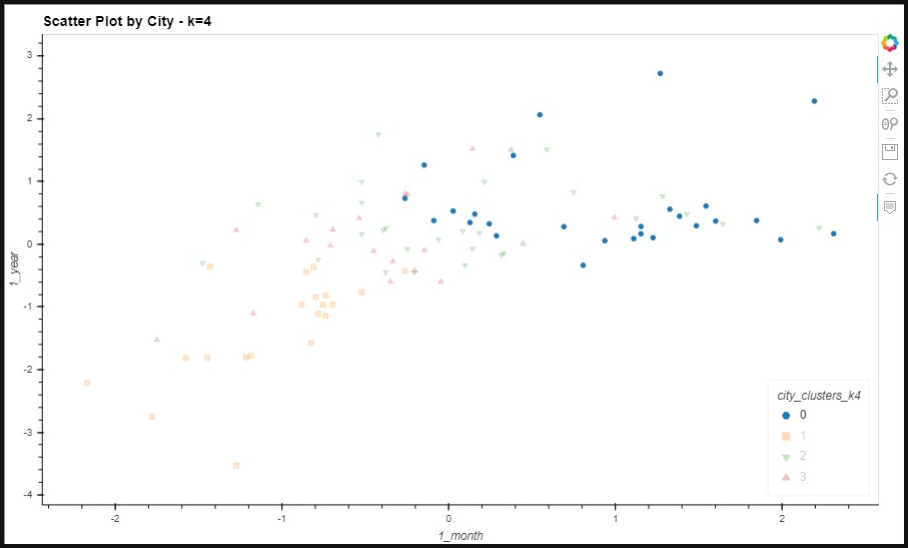

In [25]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_0_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["0"])].dropna()

bayarea_0_cities

25_years  20_years  15_years  10_years   5_years    1_year  6_months  3_months   1_month  city_clusters_k4
City                                                                                                                           
San Quentin         -2.192028 -2.458364 -1.583353 -1.844897 -2.448331 -3.681637 -4.126688 -3.243083 -1.261031                 0
Cazadero            -2.113863 -2.034319 -1.773797 -2.191236 -2.063903 -1.961873 -2.064281 -1.551829 -1.157255                 0
San Geronimo        -1.291669 -1.120949 -0.773836 -1.481241 -1.426976 -0.346922 -0.964331 -1.311935 -1.468585                 0
Fulton              -0.829169 -0.921247 -1.282473 -0.914035  0.095009 -0.103075 -0.980699 -1.401895 -2.209846                 0
Half Moon Bay       -0.679414 -1.001054 -0.443838 -0.704105 -0.712289 -1.213220 -0.764638 -0.760178 -0.712498                 0
Stanford            -0.502855 -0.483043  0.533564 -0.494783 -0.469401 -1.901981 -2.434205 -2.457430 -1.201731                 0
Kentfield           -0.194688 -0.403971 -0.008125 -0.247181 -1.184087 -0.496652 -1.635432 -1.623797 -0.831100                 0
Larkspur            -0.138832 -0.666931 -0.519648 -0.773373 -0.627541  0.127938 -0.961057 -1.173995 -0.490120                 0
San Francisco        0.052378 -0.589330 -0.020979 -0.536404 -1.781698 -2.877369 -2.954717 -2.817271 -1.779914                 0
Geyserville          0.083761  0.759670  0.064800 -0.240194  0.246159 -0.372590 -0.332514  0.121434 -1.394458                 0
Millbrae             0.157764 -0.068928  0.363844  0.084575 -0.999737 -1.872035 -1.399728 -1.191987 -1.172080                 0
Daly City            0.184735  0.119373 -0.054818  0.242554 -0.439695 -1.912676 -1.926788 -1.785726 -1.572361                 0
Los Gatos            0.243837 -0.429716  0.500250 -0.544000 -0.632783 -0.406814 -0.460187 -0.700204 -0.786624                 0
South San Francisco  0.280464  0.219224  0.128281  0.472231  0.420899 -0.907342 -1.010162 -0.772172 -0.771799                 0
Palo Alto            0.329162 -0.047781  0.818706  0.206705 -0.449306 -0.404675 -1.026531 -1.473863 -1.424109                 0
Brisbane             0.487574  0.219040  0.250784  0.175109  0.233928 -0.477401 -0.777732 -0.208421 -0.223265                 0
San Bruno            0.495066  0.416168  0.311118  0.501093  0.169274 -1.029266 -0.771185 -0.550270 -0.860750                 0
Redwood City         0.548258  0.058506  0.750765  0.583728 -0.658120 -1.033544 -0.781006 -0.460310 -0.668022                 0
Belmont              0.592460  0.151002  0.970064  0.777860 -0.893145 -0.830338 -0.581313 -0.418328 -0.490120                 0
Foster City          0.607694  0.278068  0.901599  0.432433 -0.790922 -1.033544 -0.866121 -0.622239 -0.727323                 0
Portola Valley       0.662884 -0.223761  1.088632  0.484991 -2.300676 -2.319088 -1.848220 -1.881683 -2.180196                 0
San Mateo            0.879483  0.558129  0.973736  0.963486 -0.461538 -1.178996 -0.964331 -0.652225 -0.756974                 0
Menlo Park           0.979958  0.412306  1.380069  0.735935 -1.239131 -1.662412 -1.288424 -0.730191 -0.801449                 0
Sunol                1.091421  0.575598  1.241040  0.082752 -1.344848 -1.914815 -1.118193 -1.233969 -1.438934                 0

In [26]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_1_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["1"])].dropna()

bayarea_1_cities

25_years  20_years  15_years  10_years   5_years    1_year  6_months  3_months   1_month  city_clusters_k4
City                                                                                                                           
Rodeo               -0.724449 -0.240679 -1.042188 -1.673550  2.435651  0.343978  0.855825  0.457286  1.689189                 1
Point Reyes Station -0.482377 -0.364803  0.293018  0.250757  1.377601  2.093688  0.990045  0.895093  0.606947                 1
Antioch             -0.424024  0.123786 -0.945655  0.439116  1.215093 -0.385424 -0.044432  0.019479  0.873802                 1
Discovery Bay       -0.412702  0.304364 -0.025438  1.521577  0.295087  0.055212  0.449891  0.601222  1.185131                 1
Oakley              -0.364005  0.571737 -0.497876  1.154276  0.506522  0.035961  0.453164  1.428857  2.089470                 1
Richmond            -0.303820  0.607043 -0.500499  1.294330  2.264406  0.538628  0.777257  0.619214  1.407510                 1
El Sobrante         -0.235061  0.139049 -0.364355  0.680338  3.101411  0.136494  1.261759  1.434855  2.415625                 1
San Martin          -0.165303 -0.872333 -0.366716 -0.119279  0.949488  2.773892  1.851018  1.596783  1.348209                 1
Brentwood           -0.129259  0.462875 -0.521484  1.745482  0.155295  0.070185  0.548100  0.583230  1.303733                 1
Morgan Hill         -0.126179 -0.477526 -0.007338  0.080625  0.559818  1.424178  0.747794  0.583230  0.443870                 1
San Leandro         -0.065411  0.315397 -0.247360  0.677604  0.923277  0.508682  0.665952  0.559241  0.073239                 1
Castro Valley       -0.008889  0.241107 -0.046686 -0.075835  0.157042  0.457346  0.770709  0.667193  0.206666                 1
Hayward              0.065114  0.210581 -0.316613  0.845305  0.798338  0.320449  0.639763  0.559241  0.177016                 1
Pinole               0.154850  0.821456 -0.369601 -0.122317  0.018124  0.352534  1.261759  1.278923  1.941218                 1
Moraga               0.243005  0.670484  0.178384  0.021079 -0.214281  0.423122  0.564469  0.613217  1.466811                 1
San Jose             0.340400  0.016948  0.526219  0.230706  0.625345  0.718305  0.181450 -0.088474 -0.223265                 1
San Lorenzo          0.358463  0.681885 -0.094953  0.927333  1.015889  0.352534  0.485901  0.277365 -0.045363                 1
Concord              0.511465  1.049109 -0.240802  0.463421 -0.200301  0.252001  0.574290  0.373323  0.755200                 1
Milpitas             0.576061  0.355669  0.816869  0.824950  1.316442  1.265891  0.528458  0.211394 -0.104664                 1
Lafayette            0.579225  0.947603  0.184155  0.245896  1.001036  0.254140  0.695415  0.397312  1.229607                 1
Union City           0.599869  0.542315  0.314528  0.959840  0.833286  0.299059  0.803446  0.787140  0.295618                 1
Kenwood              0.603698  0.515835  0.207239  0.426964  0.484679  1.231667  1.706977  2.268487  1.348209                 1
Glen Ellen           0.810142  0.753050  0.405815  1.033665  1.896579  1.824172  2.325699  2.712292  1.466811                 1
East Foothills       0.834032  0.407709  0.513628 -0.077657  0.885708  0.134355  0.368049  0.763151  1.229607                 1
Bethel Island        1.077269  2.061594  0.423390  2.434514  2.363134  2.318284  2.024522  2.238500  2.297023                 1
Pleasant Hill        1.222612  1.149328  0.008663  1.191948  1.395949  0.020988  0.292755  0.241381  1.007229                 1

In [27]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_2_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["2"])].dropna()

bayarea_2_cities

25_years  20_years  15_years  10_years   5_years    1_year  6_months  3_months   1_month  city_clusters_k4
City                                                                                                                     
Tiburon        0.453111  0.298296  0.851496  0.545449  1.124228  0.391036 -0.705712 -1.084035 -0.504945                 2
Los Altos      0.621346  0.150266  1.262550  0.267770  0.449731  0.795309  0.106156 -0.208421 -0.223265                 2
Newark         0.712580  0.731719  0.446474  1.148200  0.707473 -0.137299  0.312397  0.223389 -0.104664                 2
Alameda        0.875737  1.356385  1.057941  0.707681  0.259265 -0.652800 -0.267041 -0.202424 -0.312217                 2
San Carlos     0.935922  0.504250  1.251533  1.171593 -0.670352 -0.883813 -0.790827 -0.610244 -0.712498                 2
Albany         1.015170  1.283750  0.858578  0.378659  0.067925 -0.147994 -0.024790 -0.208421 -0.415993                 2
Campbell       1.023577  0.450003  1.148441  0.219769  0.222569 -0.058155 -0.198294 -0.628236 -0.682848                 2
Saratoga       1.113147  0.529075  1.773286  0.725605  0.734558  1.531128  0.679047  0.529254  0.191841                 2
Santa Clara    1.127049  0.644740  1.253893  0.765404  0.791348  0.023127 -0.378346 -0.868130 -0.831100                 2
Fremont        1.137787  1.078899  1.010986  0.852900  0.510890 -0.470984  0.024315  0.187405 -0.163964                 2
Burlingame     1.186818  0.922226  1.591499  1.251797 -0.263208 -1.181135 -0.889037 -0.766175 -1.157255                 2
Sunnyvale      1.225692  0.733558  1.520148  1.100806  0.649809  0.200665 -0.316146 -0.778170 -0.668022                 2
Cupertino      1.286876  0.854004  2.034294  0.555474  0.091514  0.784614  0.260018 -0.088474 -0.208440                 2
Mountain View  1.352805  0.915606  1.849621  0.865356  0.225191  0.194248 -0.702438 -1.239966 -1.261031                 2
Oakland        1.398006  2.044493  1.155524  1.531603  1.210724 -0.316976 -0.067348 -0.082476 -0.297392                 2
Martinez       1.722738  2.084396  0.490544  1.017563 -0.127784  0.401731  0.623395  0.403309  1.066529                 2
Berkeley       1.761696  2.088074  1.805551  1.459905  1.136460 -0.654939 -0.306325 -0.052490 -0.000887                 2
El Cerrito     2.049135  2.402706  1.114340  1.599048  2.564959 -0.028209 -0.021517 -0.250402  0.503171                 2
Atherton       3.512635  2.008818  3.139445  2.870172  0.604376 -1.611076 -1.704179 -1.695765 -1.750264                 2
Ross           4.268901  4.885741  4.867343  3.510595  3.110148  1.516155 -0.100084  0.133428  0.429045                 2

In [28]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_3_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["3"])].dropna()

bayarea_3_cities

25_years  20_years  15_years  10_years   5_years    1_year  6_months  3_months   1_month  city_clusters_k4
City                                                                                                                       
Jenner          -1.885693 -1.527893 -0.782230 -1.947583 -1.032064  0.384619  0.181450  0.607220  0.132540                 3
La Honda        -1.848150 -2.166902 -0.403965 -2.404507 -0.687826  1.770697  0.492448  0.949069 -0.386343                 3
Dillon Beach    -1.563208 -1.260704 -1.248109 -1.348478 -1.239131  0.232750  1.104623  1.434855  2.326674                 3
Tomales         -1.401716 -0.973104 -1.001266 -0.949277 -0.275440  1.522572  1.170096  0.601222  0.651423                 3
Lagunitas       -1.359678 -1.277438 -0.616444 -0.727498 -1.083612  0.989959  1.225748  0.757153  0.265967                 3
The Sea Ranch   -1.324550 -0.694698 -1.100948 -1.671120 -0.430084  0.989959  1.307590  1.021037  0.206666                 3
Woodacre        -1.279099 -1.470336 -1.050582 -1.550509 -1.125550  0.643439  0.341860 -0.274392 -0.490120                 3
Monte Rio       -1.270441 -0.615258 -1.050845 -0.399084 -0.389894  1.492626  2.063806  1.530812  0.755200                 3
Forestville     -1.249131 -1.010249 -1.280374 -0.760613 -0.261460 -0.535154 -0.404535 -0.142450 -0.475294                 3
San Pablo       -1.186282 -0.036012 -0.978707 -0.755449  0.585155  0.384619  0.708510  0.661196  1.199957                 3
Sonoma          -1.059253 -1.131247 -1.276177 -0.575595 -0.513086  0.382480  0.711784  1.146982  0.251142                 3
Cotati          -0.983086 -1.098515 -1.313951 -0.453162 -0.157490 -0.351200 -0.293231 -0.154445 -0.623547                 3
Guerneville     -0.943046 -0.450127 -1.057403 -0.318576 -0.064004  0.530072  1.094802  1.560799  1.022054                 3
Nicasio         -0.929643 -0.948830 -0.544831 -0.149356  0.675146  0.622049 -0.005148 -0.892120 -1.127604                 3
Novato          -0.896513 -1.042981 -0.899487 -0.933479 -0.809270  0.149328 -0.244126 -0.184432  0.236317                 3
Penngrove       -0.863964 -0.959128 -1.020416 -0.956264 -0.496486 -0.629271  0.341860  0.583230 -0.060188                 3
Orinda          -0.846816 -0.635854 -0.920472 -0.959606 -0.860818  0.459485  0.990045  0.985053  1.511286                 3
Santa Rosa      -0.797620 -0.805766 -1.098849 -0.454073 -0.465032 -0.509486 -0.378346 -0.070482 -0.475294                 3
San Rafael      -0.793124 -0.855783 -0.612247 -0.677674 -0.021193  0.179275 -0.470008 -0.568262  0.132540                 3
Occidental      -0.755082 -0.641922 -0.641889 -1.215715  0.160537  1.073380  0.309123  0.241381 -0.341867                 3
Cloverdale      -0.688654 -0.426773 -0.977133 -0.546430  0.060061 -0.056016 -0.149189  0.025476 -0.771799                 3
Petaluma        -0.658853 -0.693410 -0.817643 -0.582887 -0.311261 -0.085963  0.076693  0.349333 -0.297392                 3
Rohnert Park    -0.648531 -0.553840 -0.888207 -0.218927 -0.271945 -0.280612 -0.106632  0.199399 -0.371518                 3
Healdsburg      -0.635129 -0.522763 -0.812134 -0.779145 -0.228260 -0.229276  0.315670  0.451288 -0.593896                 3
Lexington Hills -0.633297 -0.969610 -0.325532 -1.155865 -0.819755  0.226333 -0.159010 -0.448315 -0.341867                 3
Windsor         -0.628969 -0.539864 -0.913389 -0.387236 -0.347957 -0.293446 -0.361977 -0.100469 -0.653197                 3
Corte Madera    -0.621976 -1.015398 -0.641364 -1.138548 -0.877419  0.040239 -0.915226 -0.658223 -0.015712                 3
Sausalito       -0.567119 -0.988918 -0.496039 -0.691346 -0.789175  0.440234 -0.692617 -1.167998 -0.771799                 3
Sebastopol      -0.564039 -0.657001 -0.808724 -0.773373  0.021618  0.696915  0.531732  0.667193 -0.356692                 3
San Anselmo     -0.530325 -0.502903 -0.219030 -0.311588 -0.092836  0.823116  0.004673  0.061460  0.814501                 3
Montara         -0.512594 -0.950669 -0.376946 -0.

---

In [29]:
growth_df_scaled.drop(columns=["city_clusters_k4"]).hvplot()


:NdOverlay   [Variable]
   :Curve   [City]   (value)

# Find the Best Value for k

In this section, you will use the elbow method to find the best value for k.

1. Code the elbow method algorithm to find the best value for k. Use a range from 1 to 11. 

2. Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.

3. Answer the following question: What is the best value for k?

In [30]:
# Create a list with the number of k-values to try
# We use a range from 1 to 11
k = list(range(1, 11))

In [31]:
# Create an empty list to store the inertia values
inertia = []

In [32]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inirtia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(growth_df)
    inertia.append(model.inertia_)
    
# View the inertia list
inertia

C:\Users\konra\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


[235.05977281384614,
 104.03882681235702,
 68.76610270907031,
 42.13299414266796,
 32.22099630650548,
 24.832708698731352,
 21.002452014693848,
 17.934216063882843,
 15.67581968933147,
 13.901703457926864]

In [33]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [34]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

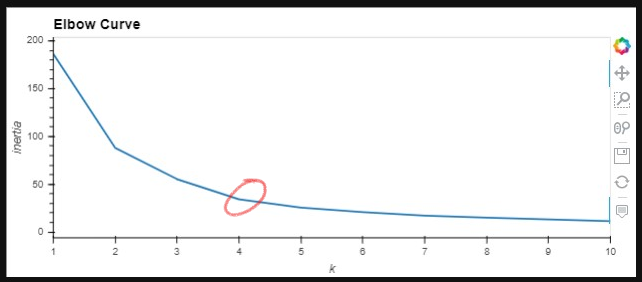

#### 3. Answer the following question: What is the best value for k?
**Question:** What is the best value for `k`?

**Answer:** 
# THE BEST VALUE FOR `k` IS 4 (k=4).

---

In [35]:
# Create a PCA model instance and set `n_components=4`.
pca = PCA(n_components=4)

In [36]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
growth_pca_data = pca.fit_transform(growth_df)

# View the first five rows of the DataFrame. 
growth_pca_data[:5]

array([[-3.07148486, -0.27897755, -0.13888146, -0.01123497],
       [-2.9451259 , -0.13044325,  0.06349994,  0.06860216],
       [-2.48896763, -0.08704667, -0.07128538,  0.35823125],
       [-2.5708869 , -0.45580526, -0.10722033,  0.35272398],
       [-2.10336201,  0.04522901, -0.00398391,  0.09793181]])

In [37]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.94349674, 0.03059512, 0.01237459, 0.0089057 ])